# Table of Contents

<ul>
<li><a href='#intro'>Introduction</a></li>
<li><a href='#regr'>Linear Regressions Analysis</a></li>
<li><a href='#neighbour'>Handling Neighbourhoods 2 and 4</a></li>
<li><a href='#neighbour2'>Further Analysis for Neighbourhood 2</a></li>
<li><a href='#estimate'>Call Demand Estimate</a></li>
<li><a href='#further'>Further Analysis</a></li>
</ul>

<a id='intro'></a>
# Introduction 

Nowhere City, USA, is divided in to 4 neighbourhoods. The city is considering building new emergency services stations in 2030. To do so, the city needs to know what the future demand for emergency services will be. 

The Neighbourhoods consist of: 
-	Neighbourhood 1: Residential
-	Neighbourhood 2: Residential and Commercial
-	Neighbourhood 3: Residential
-	Neighbourhood 4: Industrial

This analysis consists of preliminary findings based on the supplied data.

In [1]:
#import libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix
from statsmodels.graphics.regressionplots import abline_plot

%matplotlib inline

df_calls = pd.read_csv('data/dataset.csv')
df_pop = pd.read_csv('data/populationforecast.csv')

In [2]:
#check out our data 
df_calls.head()

,Neighbourhood,Year,PopulationAge_0_to_14,PopulationAge_15_to_24,PopulationAge_25_to_34,PopulationAge_35_to_44,PopulationAge_45_to_54,PopulationAge_55_to_70,PopulationAge_71_to_120,Total_Population,Calls
0,1,2001,3579,1715,1065,640,374,276,138,7787,882
1,1,2002,3790,1813,1167,669,434,303,153,8329,962
2,1,2003,3819,2018,1321,759,455,356,142,8870,938
3,1,2004,4074,2154,1359,967,469,380,173,9576,1056
4,1,2005,3496,2195,1416,855,493,439,155,9049,1006


In [3]:

df_pop.head()

,Neighbourhood,Year,PopulationAge_0_to_14,PopulationAge_15_to_24,PopulationAge_25_to_34,PopulationAge_35_to_44,PopulationAge_45_to_54,PopulationAge_55_to_70,PopulationAge_71_to_120,Total_Population
0,1,2030,6369,3079,3729,4190,2952,2581,882,23782
1,2,2030,5090,2460,2981,3350,2358,2060,705,19004
2,3,2030,3823,1848,2237,2515,1773,1547,529,14272
3,4,2030,0,0,0,0,0,0,0,0


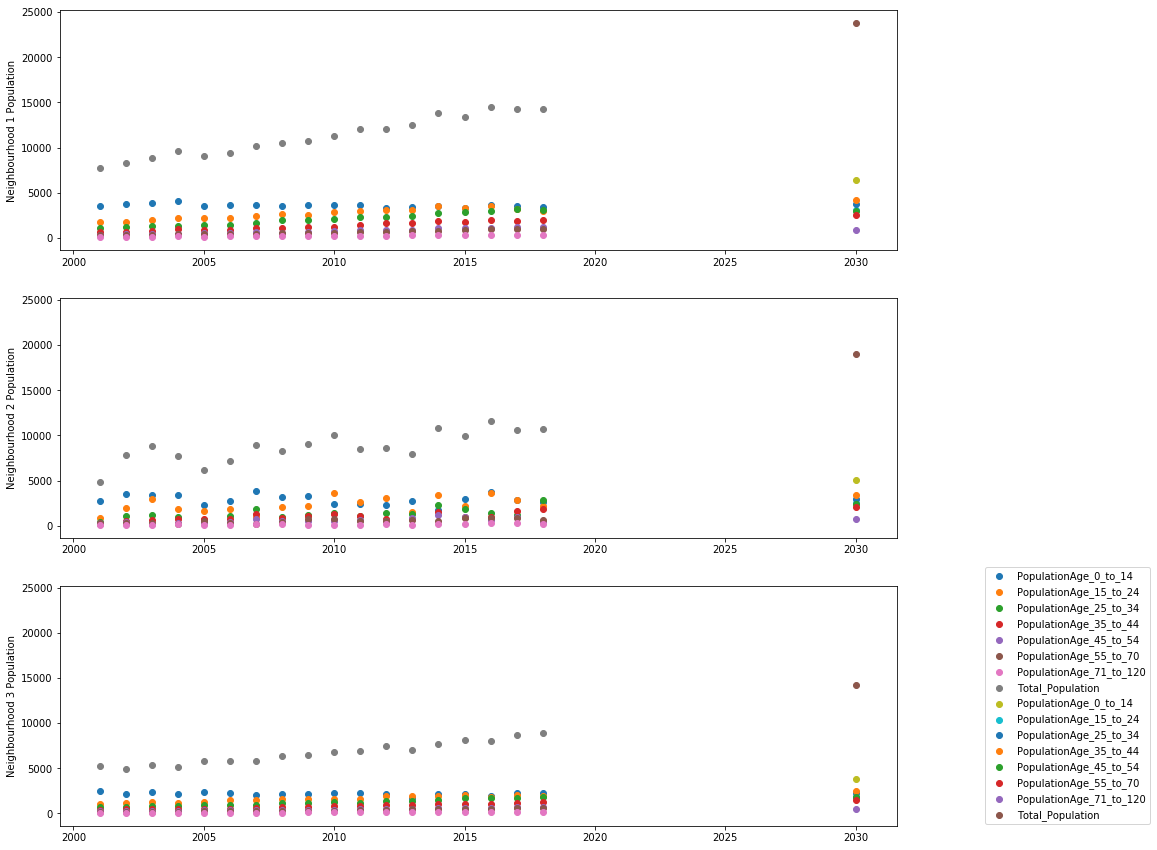

In [4]:
#plot the population data that we have to see how the city is growing / initial exploration
fig, ax = plt.subplots(3,1,sharey=True, figsize = (15,15))

cols = df_calls.columns[2:10]
cols_pop = df_pop.columns[2:10]

ax[0].xticks=[df_calls['Year'].unique().tolist(),'2030']
ax[0].yticks=range(0,25000,1000)

ax[0].set_title=('Neighbourhood 1')
for z,b in zip(ax,range(1,4)):
    z.set_ylabel('Neighbourhood ' + str(b) + ' Population')
    for y in cols:
        z.scatter(df_calls[df_calls['Neighbourhood']==b]['Year'], df_calls[df_calls['Neighbourhood']==b][y])

for z,b in zip(ax,range(1,4)):
    for y in cols:
        z.scatter(df_pop[df_pop['Neighbourhood']==b]['Year'], df_pop[df_pop['Neighbourhood']==b][y])    
   
plt.legend(bbox_to_anchor=(1.1,1.1))
plt.show();

We don't have any data for Neighbourhood 4 - presumably, being an industrial zone, there are no permanent residents.

Each neighbourhood exhibits, and projects, significant growth. Neighbourhood 2's population appears to vary significantly year to year. 

Given that the population is increasing relatively steadily, I'm expecing that there's some sort of linear relationship between population size and call demand. This may be less of the case for Neighbourhood 2, given it's fluctuation in population, but we'll have to see. 

The population sizes get up to the 20,000 people range, suggesting the city will almost double in size by 2030. There might be a case where the emergency services call requirement increases more than linearly. It doesn't seem that there's going to be a non-linear difference in demand between a neighbourhood of 10,000 and a neighbourhood of 20,000 - we'll continue with a linear assumption for the time being. 

Let's look at the rest of our data.

In [5]:
df_calls.dtypes

Neighbourhood              int64
Year                       int64
PopulationAge_0_to_14      int64
PopulationAge_15_to_24     int64
PopulationAge_25_to_34     int64
PopulationAge_35_to_44     int64
PopulationAge_45_to_54     int64
PopulationAge_55_to_70     int64
PopulationAge_71_to_120    int64
Total_Population           int64
Calls                      int64
dtype: object

<a id="regr"></a>
# Regression Analysis 

Let's start by taking a look at linear regressions for each our neighbourhoods. 

In [6]:
#add an intercept column for linear regression purposes
df_calls['Intercept'] = 1

## Neighbourhood 1

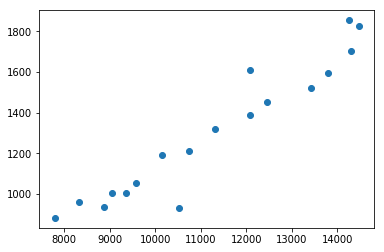

In [7]:
#check neighbourhood 1 for relationship between calls and total pop 
filt = df_calls['Neighbourhood']==1

model1 = sm.OLS(df_calls[filt]['Calls'],df_calls[filt][['Intercept','Total_Population']])
results1 = model1.fit()

plt.scatter(df_calls[filt]['Total_Population'],df_calls[filt]['Calls']);

This looks like a strong linear relationship - it seems our initial assumption is accurate. 

In [8]:
#look at linear regression results
results1.summary()

C:\Users\spenc\Anaconda3\envs\dhassign\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Calls   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     168.4
Date:                Mon, 29 Oct 2018   Prob (F-statistic):           6.57e-10
Time:                        20:43:40   Log-Likelihood:                -107.25
No. Observations:                  18   AIC:                             218.5
Df Residuals:                      16   BIC:                             220.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -295.3884    125.406     -2.355      0.032    -561.236     -29.540
Total_Population     0.1420      0.011     12.977      0.000       0.119       0.165
==============================================================================
Omnibus:                        6.425   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                3.979
Skew:                          -0.688   Prob(JB):                        0.137
Kurtosis:                       4.847   Cond. No.                     6.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

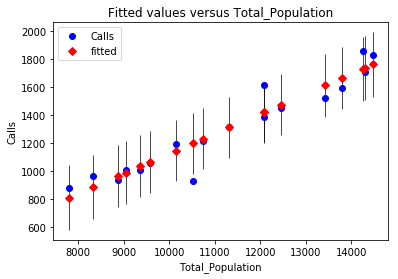

In [9]:
#looking at fitted results compared to actual Call volumes for population
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results1,1,ax=ax)
plt.show()

## Neighbourhood 2 

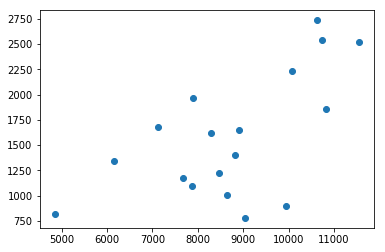

In [10]:
#check neighbourhood 2 for relationship between calls and pop
filt1 = df_calls['Neighbourhood']==2

model2 = sm.OLS(df_calls[filt1]['Calls'],df_calls[filt1][['Intercept','Total_Population']])
results2 = model2.fit()

plt.scatter(df_calls[filt1]['Total_Population'],df_calls[filt1]['Calls']);

In [11]:
results2.summary()

C:\Users\spenc\Anaconda3\envs\dhassign\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Calls   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     10.08
Date:                Mon, 29 Oct 2018   Prob (F-statistic):            0.00589
Time:                        20:43:41   Log-Likelihood:                -136.24
No. Observations:                  18   AIC:                             276.5
Df Residuals:                      16   BIC:                             278.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -356.6513    623.206     -0.572      0.575   -1677.788     964.486
Total_Population     0.2221      0.070      3.174      0.006       0.074       0.370
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.924
Skew:                          -0.460   Prob(JB):                        0.630
Kurtosis:                       2.380   Cond. No.                     4.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

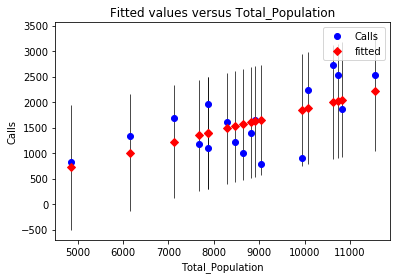

In [12]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results2,1,ax=ax)
plt.show()

Our correlation coefficient is relatively poor, suggesting a large variance if we're going to use this to extrapolate against our population nbumbers. Let's see if we can find a better correlation. 

## Neighbourhood 3

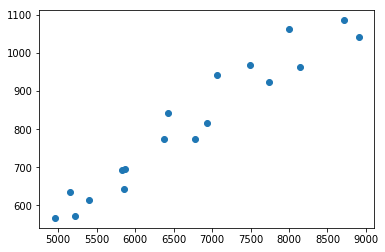

In [13]:
#check neighbourhood 3 for relationship between calls and pop

filt1 = df_calls['Neighbourhood']==3

model3 = sm.OLS(df_calls[filt1]['Calls'],df_calls[filt1][['Intercept','Total_Population']])
results3 = model3.fit()

plt.scatter(df_calls[filt1]['Total_Population'],df_calls[filt1]['Calls']);

In [14]:
results3.summary()

C:\Users\spenc\Anaconda3\envs\dhassign\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Calls   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     214.1
Date:                Mon, 29 Oct 2018   Prob (F-statistic):           1.11e-10
Time:                        20:43:41   Log-Likelihood:                -93.925
No. Observations:                  18   AIC:                             191.8
Df Residuals:                      16   BIC:                             193.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -96.1219     63.054     -1.524      0.147    -229.790      37.547
Total_Population     0.1352      0.009     14.631      0.000       0.116       0.155
==============================================================================
Omnibus:                        1.768   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.379
Skew:                           0.510   Prob(JB):                        0.502
Kurtosis:                       2.106   Cond. No.                     3.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

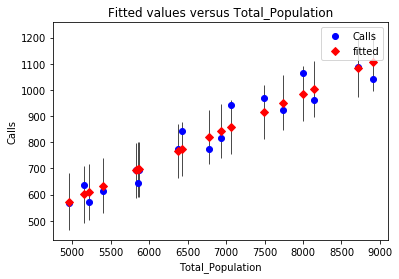

In [15]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results3,1,ax=ax)
plt.show()

<a id="neighbour"></a>
# Handling Neighbourhood 2 and 4

The correlation coefficient for Neighbourhood 2 was poor, compared to its own total population values. Given that Neighbourhood 2 is a mixed commercial and residential zone, it stands to reason that the overall demand for calls in the neighbourhood will be affected by the overall population of the city. 

Having no population data for Neighbourhood 4 prevents us from comparing its population against the calls required. 

Given that Neighbourhood 4 is industrial, it would make sense that the number of people working there is somehow related to the total population of Nowhere. Let's use that as the basis for our comparison.

Let's put together the total population of the city for use in trying to get a better estiamte for these two neighbourhoods.

In [16]:
#get total town population for each year
tot_pop = df_calls.groupby(['Year'])[['Total_Population','Intercept']].sum()

In [17]:
#reset intercept to 1 
tot_pop['Intercept']=1

### Neighbourhood 2 

In [18]:
# matching up indices for plotting/ linear regression
df_calls[df_calls['Neighbourhood']==2]['Calls']

18     818
19    1098
20    1404
21    1178
22    1338
23    1683
24    1650
25    1616
26     780
27    2234
28    1226
29    1007
30    1965
31    1859
32     897
33    2524
34    2735
35    2540
Name: Calls, dtype: int64

In [19]:
#generate list based on indices we want
x = list(range(18,36))

In [20]:
tot_pop['index'] = x
tot_pop.reset_index(level=0,inplace=True)
tot_pop.set_index('index',inplace=True)
tot_pop

,Year,Total_Population,Intercept
index,,,
18,2001,17856,1
19,2002,21163,1
20,2003,23095,1
21,2004,22397,1
22,2005,21042,1
23,2006,22336,1
24,2007,24922,1
25,2008,25192,1
26,2009,26211,1


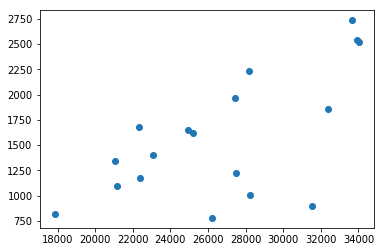

In [21]:
filt1 = df_calls['Neighbourhood']==2

model2_pop = sm.OLS(df_calls[filt1]['Calls'],tot_pop[['Intercept','Total_Population']])
results2_pop = model2_pop.fit()
plt.scatter(tot_pop['Total_Population'],df_calls[filt1]['Calls']);

In [22]:
results2_pop.summary()

C:\Users\spenc\Anaconda3\envs\dhassign\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Calls   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     11.30
Date:                Mon, 29 Oct 2018   Prob (F-statistic):            0.00397
Time:                        20:43:41   Log-Likelihood:                -135.82
No. Observations:                  18   AIC:                             275.6
Df Residuals:                      16   BIC:                             277.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -562.8807    649.584     -0.867      0.399   -1939.938     814.177
Total_Population     0.0804      0.024      3.361      0.004       0.030       0.131
==============================================================================
Omnibus:                        3.373   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.185   Jarque-Bera (JB):                2.326
Skew:                          -0.877   Prob(JB):                        0.313
Kurtosis:                       2.835   Cond. No.                     1.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

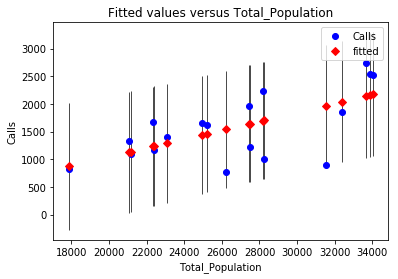

In [23]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results2_pop,1,ax=ax)
plt.show()

This is a stronger relationship, though still weaker than I'd want to spend money on. We'll continue assessing Neighbourhood 2 later. 

### Neighbourhood 4

In [24]:
filt1 = df_calls['Neighbourhood']==4
df_calls[filt1]

,Neighbourhood,Year,PopulationAge_0_to_14,PopulationAge_15_to_24,PopulationAge_25_to_34,PopulationAge_35_to_44,PopulationAge_45_to_54,PopulationAge_55_to_70,PopulationAge_71_to_120,Total_Population,Calls,Intercept
54,4,2001,0,0,0,0,0,0,0,0,977,1
55,4,2002,0,0,0,0,0,0,0,0,1045,1
56,4,2003,0,0,0,0,0,0,0,0,1071,1
57,4,2004,0,0,0,0,0,0,0,0,1149,1
58,4,2005,0,0,0,0,0,0,0,0,1112,1
59,4,2006,0,0,0,0,0,0,0,0,1102,1
60,4,2007,0,0,0,0,0,0,0,0,1235,1
61,4,2008,0,0,0,0,0,0,0,0,1366,1
62,4,2009,0,0,0,0,0,0,0,0,1305,1
63,4,2010,0,0,0,0,0,0,0,0,1244,1


In [25]:
#resetting index to look at neighbourhood 4. I'm sure there's a better way

x = list(range(54,72)) #range gathered from visual inspection

tot_pop['index'] = x
tot_pop.set_index('index',inplace=True)
tot_pop


,Year,Total_Population,Intercept
index,,,
54,2001,17856,1
55,2002,21163,1
56,2003,23095,1
57,2004,22397,1
58,2005,21042,1
59,2006,22336,1
60,2007,24922,1
61,2008,25192,1
62,2009,26211,1


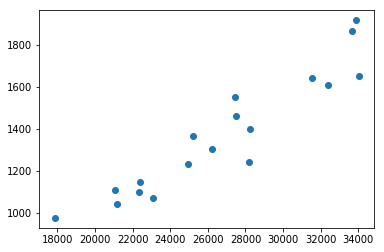

In [26]:
filt1 = df_calls['Neighbourhood']==4

model4 = sm.OLS(df_calls[filt1]['Calls'],tot_pop[['Intercept','Total_Population']])
results4 = model4.fit()

plt.scatter(tot_pop['Total_Population'],df_calls[filt1]['Calls']);

In [27]:
results4.summary()

C:\Users\spenc\Anaconda3\envs\dhassign\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Calls   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     124.8
Date:                Mon, 29 Oct 2018   Prob (F-statistic):           5.75e-09
Time:                        20:43:42   Log-Likelihood:                -107.13
No. Observations:                  18   AIC:                             218.3
Df Residuals:                      16   BIC:                             220.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -78.4667    131.932     -0.595      0.560    -358.151     201.217
Total_Population     0.0543      0.005     11.173      0.000       0.044       0.065
==============================================================================
Omnibus:                        0.186   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.269
Skew:                          -0.199   Prob(JB):                        0.874
Kurtosis:                       2.553   Cond. No.                     1.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

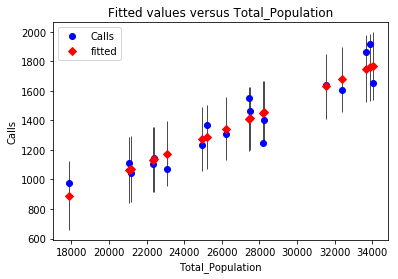

In [28]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results4,1,ax=ax)
plt.show()


Decent correlation, sensible responses. This suggests that my assumption, at least for Neighbourhood 4, has some weight to it. We'll use this for our predictions going forward. 

<a id="neighbour2"></a>
# Further Analysis for Neighbourhood 2

The correlation for Neighbourhood 2 with its own population and the total City's population leave much to be desired. This section consists of attempts at finding a better correlation - that makes sense. 

I still haven't found a correlation that I'm happy with at this point, and this by no means is an exhausting of attempts.

## Multivariable Analysis

Let's throw the kitchen sink at it. We have a lot of additional varaibles beyond total population for each of the systems that we haven't used yet. Let's try a regression with all of those.

In [29]:
#filter for neighbourhood 2
filt1 = df_calls['Neighbourhood']==2

#use all population values we have
model2_sink = sm.OLS(df_calls[filt1]['Calls'],df_calls[filt1].iloc[:,2:12].drop(columns='Calls'))
results2_sink = model2_sink.fit()

In [30]:
results2_sink.summary()

C:\Users\spenc\Anaconda3\envs\dhassign\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Calls   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     2.287
Date:                Mon, 29 Oct 2018   Prob (F-statistic):              0.114
Time:                        20:43:42   Log-Likelihood:                -132.03
No. Observations:                  18   AIC:                             280.1
Df Residuals:                      10   BIC:                             287.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
PopulationAge_0_to_14      -0.4323      0.327     -1.321      0.216      -1.162       0.297
PopulationAge_15_to_24     -0.3124      0.288     -1.086      0.303      -0.953       0.329
PopulationAge_25_to_34     -0.6242      0.393     -1.590      0.143      -1.499       0.251
PopulationAge_35_to_44      0.6759      0.547      1.235      0.245      -0.543       1.895
PopulationAge_45_to_54     -0.9512      0.696     -1.366      0.202      -2.503       0.600
PopulationAge_55_to_70     -0.8191      0.883     -0.927      0.376      -2.787       1.149
PopulationAge_71_to_120     2.9194      1.881      1.552      0.152      -1.271       7.110
Total_Population            0.4561      0.202      2.255      0.048       0.005       0.907
Intercept                 263.3257    902.171      0.292      0.776   -1746.837    2273.488
==============================================================================
Omnibus:                        2.020   Durbin-Watson:                   2.755
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                0.780
Skew:                           0.483   Prob(JB):                        0.677
Kurtosis:                       3.324   Cond. No.                     1.02e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.67e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

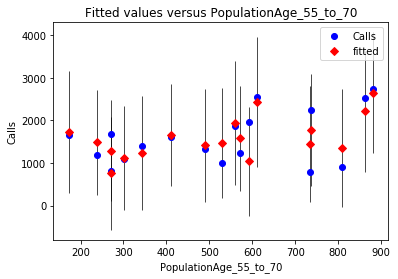

In [31]:
#looking through plots
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results2_sink,5,ax=ax)
plt.show()

Kitchen sink didn't work either - unsurprisingly, we're seeing a large amount of colinearity. Our best p-value is also with total population. 

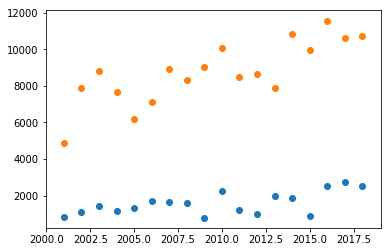

In [32]:
#let's go back and look at this thing again
filt1 = df_calls['Neighbourhood']==2

fig, ax = plt.subplots()

ax = plt.scatter(df_calls[filt1]['Year'],df_calls[filt1]['Calls']);
ax = plt.scatter(df_calls[filt1]['Year'],df_calls[filt1]['Total_Population']);


This is suggesting some sinusodial response coupled with a linear increase in the data. Let's try that. 

In [33]:
y = df_calls[filt1]['Calls']

a = df_calls[filt1]['Total_Population']

c = df_calls[filt1]['Intercept']


results2_mod = smf.ols(formula='Calls ~ Total_Population * np.sin(Total_Population) + Total_Population', data=df_calls[filt1]).fit()
results2_mod.summary()

C:\Users\spenc\Anaconda3\envs\dhassign\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Calls   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     3.619
Date:                Mon, 29 Oct 2018   Prob (F-statistic):             0.0402
Time:                        20:43:42   Log-Likelihood:                -135.46
No. Observations:                  18   AIC:                             278.9
Df Residuals:                      14   BIC:                             282.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                  -462.3306    689.025     -0.671      0.513   -1940.142    1015.480
Total_Population                              0.2322      0.077      3.033      0.009       0.068       0.396
np.sin(Total_Population)                    -69.7878    858.902     -0.081      0.936   -1911.950    1772.375
Total_Population:np.sin(Total_Population)    -0.0130      0.100     -0.130      0.899      -0.228       0.202
==============================================================================
Omnibus:                        0.482   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.786   Jarque-Bera (JB):                0.426
Skew:                          -0.320   Prob(JB):                        0.808
Kurtosis:                       2.600   Cond. No.                     6.90e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

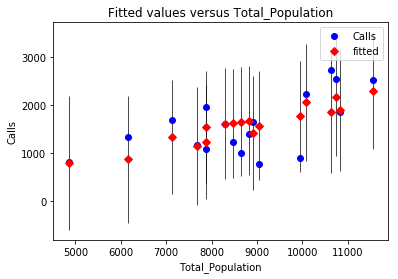

In [34]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results2_mod,1,ax=ax)
plt.show()

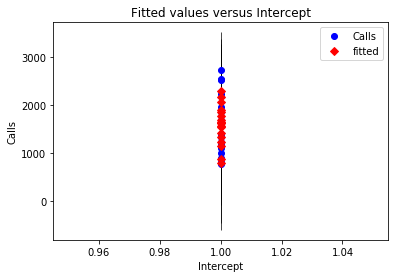

In [35]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results2_mod,0,ax=ax)
plt.show()

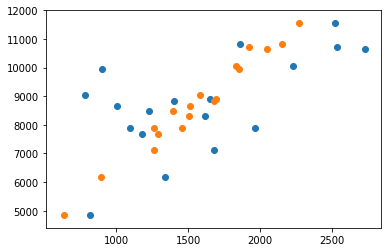

In [36]:
fig, ax = plt.subplots()
ax = plt.scatter(y,a)
ax = plt.scatter(-.0130*a*np.sin(-69.787*a)+ .2322*a + -462,a)

This doesn't fit our data well at all, either. Let's try a logarithmic approach.

In [37]:
y = df_calls[filt1]['Calls']

a = df_calls[filt1]['Total_Population']

c = df_calls[filt1]['Intercept']


results2_mod = smf.ols(formula='Calls ~ Total_Population * np.log(Total_Population) + Total_Population', data=df_calls[filt1]).fit()
results2_mod.summary()

C:\Users\spenc\Anaconda3\envs\dhassign\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Calls   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     5.606
Date:                Mon, 29 Oct 2018   Prob (F-statistic):            0.00973
Time:                        20:43:42   Log-Likelihood:                -133.53
No. Observations:                  18   AIC:                             275.1
Df Residuals:                      14   BIC:                             278.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                 -6.359e+05   3.68e+05     -1.730      0.106   -1.42e+06    1.52e+05
Total_Population                           -138.1346     75.772     -1.823      0.090    -300.649      24.380
np.log(Total_Population)                   9.253e+04   5.31e+04      1.744      0.103   -2.13e+04    2.06e+05
Total_Population:np.log(Total_Population)    12.6673      6.909      1.833      0.088      -2.151      27.486
==============================================================================
Omnibus:                        0.565   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.754   Jarque-Bera (JB):                0.584
Skew:                           0.000   Prob(JB):                        0.747
Kurtosis:                       2.118   Cond. No.                     2.82e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

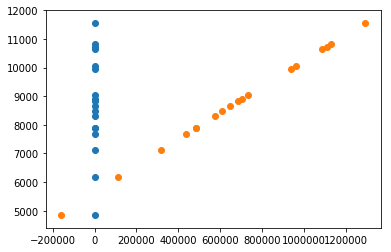

In [38]:
fig, ax = plt.subplots()
ax = plt.scatter(y,a)
ax = plt.scatter(19.8042*a*np.log(1.542e+05*a)+ -217.1930*a + -1.07e+06,a)

That ain't working either. Let's try looking at the original data again and maybe dropping some problem points as outliers. 

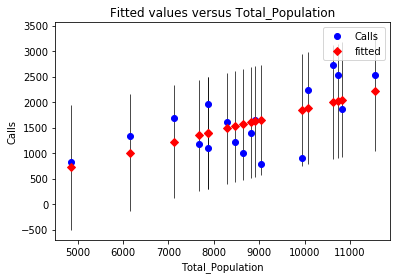

In [39]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results2,1,ax=ax)
plt.show()

Let's try chopping off some of the lower values in the data set and see how that affects our relationship. Naturally, the fewer points that we have the better our correlation. I'm targeting the lower call volumes simply because there appears to be some sort of cyclic response in the data that I haven't figured out how to assess. 

Further, if there's a large swing in the amount of calls between each year, the infrastructure will still be required. Building infrastructure is going to take time, and over-estimating here with more accuracy is more likely to lead to a better decision.

In [40]:
filt1=df_calls['Neighbourhood'] ==2
df_calls[filt1]

,Neighbourhood,Year,PopulationAge_0_to_14,PopulationAge_15_to_24,PopulationAge_25_to_34,PopulationAge_35_to_44,PopulationAge_45_to_54,PopulationAge_55_to_70,PopulationAge_71_to_120,Total_Population,Calls,Intercept
18,2,2001,2715,862,377,198,309,271,117,4849,818,1
19,2,2002,3488,1952,1075,516,427,302,120,7880,1098,1
20,2,2003,3394,3006,1188,650,195,343,43,8819,1404,1
21,2,2004,3398,1870,977,701,337,238,146,7667,1178,1
22,2,2005,2267,1629,631,766,255,491,121,6160,1338,1
23,2,2006,2732,1796,1023,774,430,270,92,7117,1683,1
24,2,2007,3854,908,1849,1289,686,172,147,8905,1650,1
25,2,2008,3147,2122,980,903,562,411,173,8298,1616,1
26,2,2009,3264,2199,1141,1124,508,735,67,9038,780,1
27,2,2010,2367,3626,1416,1310,548,736,67,10070,2234,1


In [41]:
df_calls_n2 = df_calls.drop(index=[26,32])
df_calls_n2[filt1]

C:\Users\spenc\Anaconda3\envs\dhassign\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Neighbourhood,Year,PopulationAge_0_to_14,PopulationAge_15_to_24,PopulationAge_25_to_34,PopulationAge_35_to_44,PopulationAge_45_to_54,PopulationAge_55_to_70,PopulationAge_71_to_120,Total_Population,Calls,Intercept
18,2,2001,2715,862,377,198,309,271,117,4849,818,1
19,2,2002,3488,1952,1075,516,427,302,120,7880,1098,1
20,2,2003,3394,3006,1188,650,195,343,43,8819,1404,1
21,2,2004,3398,1870,977,701,337,238,146,7667,1178,1
22,2,2005,2267,1629,631,766,255,491,121,6160,1338,1
23,2,2006,2732,1796,1023,774,430,270,92,7117,1683,1
24,2,2007,3854,908,1849,1289,686,172,147,8905,1650,1
25,2,2008,3147,2122,980,903,562,411,173,8298,1616,1
27,2,2010,2367,3626,1416,1310,548,736,67,10070,2234,1
28,2,2011,2385,2578,1039,1122,675,572,98,8469,1226,1


In [42]:
filt1 = df_calls_n2['Neighbourhood']==2

model2_drop = sm.OLS(df_calls_n2[filt1]['Calls'],df_calls_n2[filt1][['Intercept','Total_Population']])
results2_drop = model2_drop.fit()
results2_drop.summary()

C:\Users\spenc\Anaconda3\envs\dhassign\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Calls   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     21.83
Date:                Mon, 29 Oct 2018   Prob (F-statistic):           0.000360
Time:                        20:43:43   Log-Likelihood:                -116.68
No. Observations:                  16   AIC:                             237.4
Df Residuals:                      14   BIC:                             238.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -520.5559    480.461     -1.083      0.297   -1551.042     509.930
Total_Population     0.2542      0.054      4.672      0.000       0.137       0.371
==============================================================================
Omnibus:                        1.644   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                0.924
Skew:                          -0.152   Prob(JB):                        0.630
Kurtosis:                       1.863   Cond. No.                     4.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

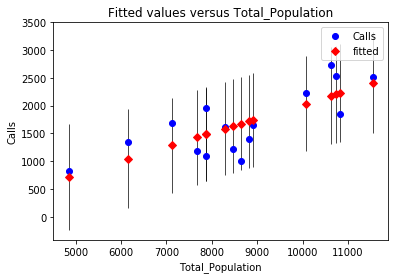

In [43]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results2_drop,1,ax=ax)
plt.show()

Unsurprisingly, our correlation gets better when we drop some of our lower values as outliers.There's room for improvement with this estimate, but we'll use this for the time being.

In [44]:
pred2_drop = df_pop[df_pop['Neighbourhood']==2]['Total_Population'] * results2_drop.params[1] + results2_drop.params[0], results2_drop.rsquared
pred2_drop

(1    4309.875977
 Name: Total_Population, dtype: float64, 0.6092123472344217)

In [45]:
#figuring out paramter on the upper end of a 95% confidence interval
pred2_drop_u = df_pop[df_pop['Neighbourhood']==2]['Total_Population'] * results2_drop.conf_int(.05)[1]['Total_Population'] + results2_drop.conf_int(.05)[1]['Intercept']
pred2_drop_u

1    7558.007071
Name: Total_Population, dtype: float64

<a id="estimate"></a>
# Call Demand Estimate

Our estimates for yearly call demand are below.

In [104]:
#Neighbourhood 1
pred1 = df_pop[df_pop['Neighbourhood']==1]['Total_Population'][0] * results1.params[1] + results1.params[0]
pred1_u = df_pop[df_pop['Neighbourhood']==1]['Total_Population'][0] * results1.conf_int(0.05)[1]['Total_Population'] + results1.conf_int(0.05)[1]['Intercept']
pred1_l = df_pop[df_pop['Neighbourhood']==1]['Total_Population'][0] * results1.conf_int(0.05)[0]['Total_Population'] + results1.conf_int(0.05)[0]['Intercept']

print('Predicted Demand:' ,pred1, '\n'+
     'Upper Demand Bounds:' ,pred1_u, '\n'+
     'Lower Demand Bounds:' ,pred1_l , '\n'+
     'Correlation Coefficient:', results1.rsquared)


Predicted Demand: 3082.3207827236192 
Upper Demand Bounds: 3899.9448406644206 
Lower Demand Bounds: 2264.696724782818 
Correlation Coefficient: 0.9132338843071465


In [106]:
#Neighbourhood 2 - against total population projections, same as our model
pred2_s = df_pop['Total_Population'].sum() * results2_pop.params[1] + results2_pop.params[0]
pred2_s_u = df_pop['Total_Population'].sum()  * results2_pop.conf_int(0.05)[1]['Total_Population'] + results2_pop.conf_int(0.05)[1]['Intercept']
pred2_s_l = df_pop['Total_Population'].sum() * results2_pop.conf_int(0.05)[0]['Total_Population'] + results2_pop.conf_int(0.05)[0]['Intercept']

print('Predicted Demand:' ,pred2_s, '\n'+
     'Upper Demand Bounds:' ,pred2_s_u, '\n'+
     'Lower Demand Bounds:' ,pred2_s_l , '\n'+
     'Correlation Coefficient:', results2_pop.rsquared)

Predicted Demand: 4026.0745629945686 
Upper Demand Bounds: 8297.512885105392 
Lower Demand Bounds: -245.36375911625487 
Correlation Coefficient: 0.41384723666619927


In [121]:
# get upper and lower limits for dropped lower values in prediction. Have to do a bit of weird indexing based on how the data was spit out
pred2_drop_u = df_pop[df_pop['Neighbourhood']==2]['Total_Population'][1] * results2_drop.conf_int(0.05)[1]['Total_Population'] + results2_drop.conf_int(0.05)[1]['Intercept']
pred2_drop_l = df_pop[df_pop['Neighbourhood']==2]['Total_Population'][1] * results2_drop.conf_int(0.05)[0]['Total_Population'] + results2_drop.conf_int(0.05)[0]['Intercept']

print('Predicted Demand:' ,pred2_drop[1], '\n'+
     'Upper Demand Bounds:' ,pred2_drop_u, '\n'+
     'Lower Demand Bounds:' ,pred2_drop_l , '\n'+
     'Correlation Coefficient:', results2_drop.rsquared)

Predicted Demand: 0.6092123472344217 
Upper Demand Bounds: 7558.007070983472 
Lower Demand Bounds: 1061.7448821087542 
Correlation Coefficient: 0.6092123472344217


In [123]:
#Neighbourhood 3

pred3 = df_pop[df_pop['Neighbourhood']==3]['Total_Population'][2] * results3.params[1] + results3.params[0]
pred3_u = df_pop[df_pop['Neighbourhood']==3]['Total_Population'][2] * results3.conf_int(0.05)[1]['Total_Population'] + results3.conf_int(0.05)[1]['Intercept']
pred3_l = df_pop[df_pop['Neighbourhood']==3]['Total_Population'][2] * results3.conf_int(0.05)[0]['Total_Population'] + results3.conf_int(0.05)[0]['Intercept']

print('Predicted Demand:' ,pred3, '\n'+
     'Upper Demand Bounds:' ,pred3_u, '\n'+
     'Lower Demand Bounds:' ,pred3_l , '\n'+
     'Correlation Coefficient:', results3.rsquared)


Predicted Demand: 1833.5261556931405 
Upper Demand Bounds: 2246.7867750953674 
Lower Demand Bounds: 1420.2655362909134 
Correlation Coefficient: 0.9304534925261487


In [124]:
#Neighbourhood 4 - against total population projections, same as our model

pred4 = df_pop['Total_Population'].sum() * results4.params[1] + results4.params[0]
pred4_u = df_pop['Total_Population'].sum() * results4.conf_int(0.05)[1]['Total_Population'] + results4.conf_int(0.05)[1]['Intercept']
pred4_l = df_pop['Total_Population'].sum()  * results4.conf_int(0.05)[0]['Total_Population'] + results4.conf_int(0.05)[0]['Intercept']

print('Predicted Demand:' ,pred4, '\n'+
     'Upper Demand Bounds:' ,pred4_u, '\n'+
     'Lower Demand Bounds:' ,pred4_l , '\n'+
     'Correlation Coefficient:', results4.rsquared)


Predicted Demand: 3019.8848559339567 
Upper Demand Bounds: 3887.4248851330067 
Lower Demand Bounds: 2152.3448267349067 
Correlation Coefficient: 0.88639555278393


<a id="further"></a>
# Further Analysis
* Seeing if there are better correlations for Neighourhood 3 with subsets of the population.
* See if I can get a better model for population growth for neighbourhood 2. 
* Lasso or  ridge regression for Neighbourhood 2 maybe? 
* Plot out t-stat band and confidence interval on graphs to get a better idea of uncertainty and a visual to assess how our estimate will be. 
* Get a better idea of capacity of existing stations - how much can they serve comfortably now? Will help narrow down how certain we have to be. 
* Get a better idea of how much budget the city has to throw at the problem. 
* Look in to potential staffing strategies that can flex with call volumes to minimize labor costs